In [1]:
import os
os.chdir('/Users/Olivier/anaconda3/envs/guitarsounds')
%load_ext autoreload

In [4]:
%autoreload 2
from guitarsounds import Sound, Signal
import guitarsounds as guit

In [3]:
import librosa
import librosa.display
from soundfile import write
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
from scipy import signal as sig
from noisereduce import reduce_noise

# Global Parameters

## Printing functions

In [5]:
# Printing the parameter values
guit.SP.info()  # SP stands for SoundParameters

general
	 octave_fraction : 3
	 fft_range : 2000
	 onset_delay : 100
envelop
	 frame_size : 524
	 hop_length : 200
log_envelop
	 start_time : 0.01
	 min_window : None
	 max_window : 2048
fundamental
	 min_freq : 60
	 max_freq : 2000
	 frame_length : 1024
bins
	 bass : 100
	 mid : 700
	 highmid : 2000
	 uppermid : 4000
	 presence : 6000


In [6]:
# Printing the parameter value and an info string explaining what they do
guit.SP.more_info()

general
	 octave_fraction : 3 [Fraction of the octave used for octave computations]
	 fft_range : 2000 [Maximum frequency in the Fourier transform plot]
	 onset_delay : 100 [Delay before the onset (attack) to keep when trimming the signal]
envelop
	 frame_size : 524 [Number of samples in the array used to compute a point of the envelop]
	 hop_length : 200 [Number of samples between envelop points]
log_envelop
	 start_time : 0.01 [First point in the log scale envelop]
	 min_window : None [Minimum window size for the log envelop computed from start_time by default]
	 max_window : 2048 [Maximum window size for the log envelop in samples]
fundamental
	 min_freq : 60 [Minimum frequency for the fundamental finding algorithm (Hz)]
	 max_freq : 2000 [Maximum frequency for the fundamental finding algorithm (Hz)]
	 frame_length : 1024 [Frame length in samples to compute the fundamentals across the signal]
bins
	 bass : 100 [Higher cutoff value for the bass bin (Hz), the lower value is zero]
	 mi

In [7]:
# Function to change the value of a parameter
guit.SP.change('octave_fraction', 3)

In [8]:
guit.SP.bins.info()

bins
	 bass : 100
	 mid : 700
	 highmid : 2000
	 uppermid : 4000
	 presence : 6000


In [9]:
guit.SP.info()

general
	 octave_fraction : 3
	 fft_range : 2000
	 onset_delay : 100
envelop
	 frame_size : 524
	 hop_length : 200
log_envelop
	 start_time : 0.01
	 min_window : None
	 max_window : 2048
fundamental
	 min_freq : 60
	 max_freq : 2000
	 frame_length : 1024
bins
	 bass : 100
	 mid : 700
	 highmid : 2000
	 uppermid : 4000
	 presence : 6000


## Changing their values

In [10]:
# The Global Parameters are used when creating a Sound and a copy is bound to the Sound object
file2 = "soundfiles/flax_carbon/Carbon_D0_2.wav"
Sound2 = Sound(file2)
Sound2.condition()

print(Sound2.SP.general.octave_fraction.value)

3


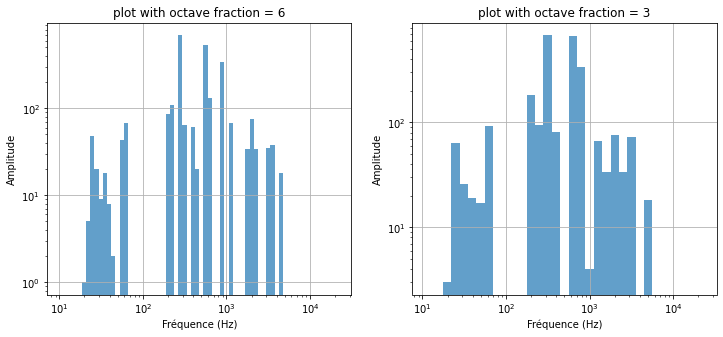

In [11]:
# The value can be changed inside the Sound instance
# but this only works for parameters not used in the conditioning of the signal 

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
Sound2.SP.change('octave_fraction', 6)
Sound2.signal.plot(kind='fft hist')
plt.title('plot with octave fraction = 6')

plt.subplot(1,2,2)
Sound2.SP.change('octave_fraction', 3)
Sound2.signal.plot(kind='fft hist')
plt.title('plot with octave fraction = 3')

plt.show()

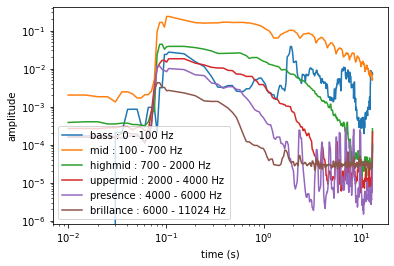

In [12]:
SP_copy = guit.SP

SP_copy.change('bass', 300)

SP_copy = guit.sound_parameters()

Sound3 = Sound(file2, SoundParams=SP_copy)
Sound3.condition()
Sound3.plot_freq_bins()